In [1]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
# data loading
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRT7jijFOSq-l4F4yyzexaBTrM4w1DqzzrUZD0kMk4mJELbEbMqk3xPsQkefkEZ1dGsR8DipZKWSGuO/pub?output=csv'
feedback = pd.read_csv(url)
feedback.head()

,Timestamp,In which course did you complete this module?,What is your (planned) major?,Which year are you?,What worked well for you in the module session(s)?,What didn't work so well for you?,Have you previously taken Data 8 or other data science courses?,"After participating in this module, are you considering taking Data 8 or other data science courses?",Would you like to see more modules in other courses?,How would you rate your overall experience on a scale of 1-10 (10 being best)?,Any other comments?
0,9/6/2017 16:42:54,IAS-150,NaN,NaN,The individual help and attentiveness of our i...,My general lack of knowledge,No,Yes,Yes,NaN,NaN
1,9/6/2017 16:43:04,IAS-150,NaN,NaN,The content was relevant and everything was we...,"Some of it was a bit difficult, but it was doable",No,Yes,Yes,NaN,NaN
2,9/6/2017 16:43:28,IAS-150,NaN,NaN,Country estimates,Coding,No,No,No,NaN,Data Science is hard
3,9/6/2017 16:44:13,IAS-150,NaN,NaN,The students teaching the module were very hel...,I feel that the module could have been more gu...,No,Yes,Yes,NaN,NaN
4,9/6/2017 16:44:50,IAS-150,NaN,NaN,The instructors were very helpful and some of ...,Sometimes we went through the material really ...,No,Yes,Yes,NaN,"If there were to be more modules, I think it w..."


In [3]:
# renaming columns
feedback.columns = ['Timestamp', 'course',
       'major', 'year',
       'worked well',
       "did not work well",
       'previous experience',
       'considering data 8 after module',
       'more modules',
       'rating',
       'comments']
feedback.head(2)

,Timestamp,course,major,year,worked well,did not work well,previous experience,considering data 8 after module,more modules,rating,comments
0,9/6/2017 16:42:54,IAS-150,NaN,NaN,The individual help and attentiveness of our i...,My general lack of knowledge,No,Yes,Yes,NaN,NaN
1,9/6/2017 16:43:04,IAS-150,NaN,NaN,The content was relevant and everything was we...,"Some of it was a bit difficult, but it was doable",No,Yes,Yes,NaN,NaN


In [4]:
# start analysis

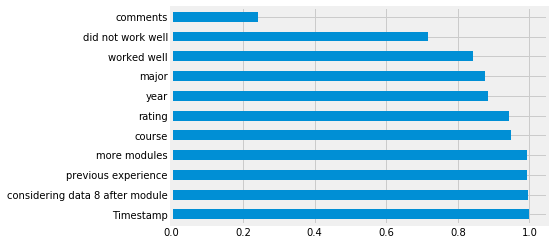

In [5]:
# proportion of each column has a response
(1 - feedback.isnull().mean().sort_values()).plot(kind='barh')

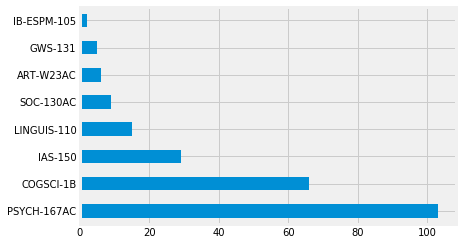

In [6]:
# number of responses for each course
feedback['course'].value_counts().plot(kind='barh')

In [7]:
feedback.describe()

,rating
count,234.000000
mean,7.709402
std,1.775174
min,1.000000
25%,7.000000
50%,8.000000
75%,9.000000
max,10.000000


<Container object of 3 artists>

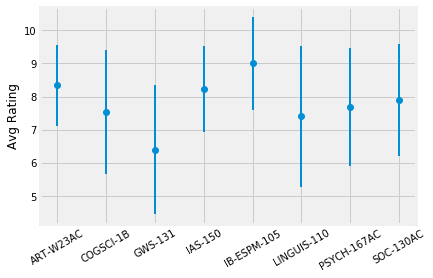

In [11]:
course = feedback.groupby('course')
x = np.arange(len(course))
y = list(feedback.groupby('course').mean()['rating'])
std = list(feedback.groupby('course').std()['rating'])
plt.xticks(x, feedback.groupby('course').mean().index, rotation=30)
plt.ylabel('Avg Rating')

plt.errorbar(x, y, std, linestyle='None', marker='o', elinewidth=2)

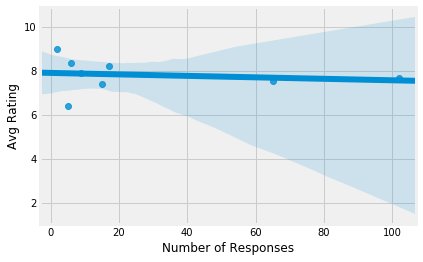

In [10]:
sns.regplot(feedback.groupby('course').count()['rating'], feedback.groupby('course').mean()['rating'])
plt.ylabel('Avg Rating')
plt.xlabel('Number of Responses')